# Интернет-магазин "Стримчик"
Исследование данных до 2016 года для планировании компании 2017 года.  

**Цель исследования** — выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

**Ход исследования**  
Исследовать из открытых источников доступные исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  
Таким образом, исследование пройдёт в шесть этапов:
 1. Обзор данных.
 2. Подготовка данных.
 3. Проведение исследовательского анализа данных.
 4. Составление портрета пользователя каждого региона.
 5. Проверка гипотез.
 6. Общий вывод.

## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# чтение файла с данными и сохранение в df
data = pd.read_csv('/datasets/games.csv')

In [3]:
# получение первых 10 строк таблицы df
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# получение общей информации о данных в таблице df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, в таблице одиннадцать столбцов. Тип данных во всех столбцах — `object`, `float`.

Согласно документации к данным:
* `Name` — название игры;  
* `Platform` — платформа;  
* `Year_of_Release` — год выпуска;  
* `Genre` — жанр игры;  
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий);  
* `EU_sales` — продажи в Европе (миллионы проданных копий);
* `JP_sales` — продажи в Японии (миллионы проданных копий);  
* `Other_sales` — продажи в других странах (миллионы проданных копий);  
* `Critic_Score` — оценка критиков (максимум 100);  
* `User_Score` — оценка пользователей (максимум 10);  
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

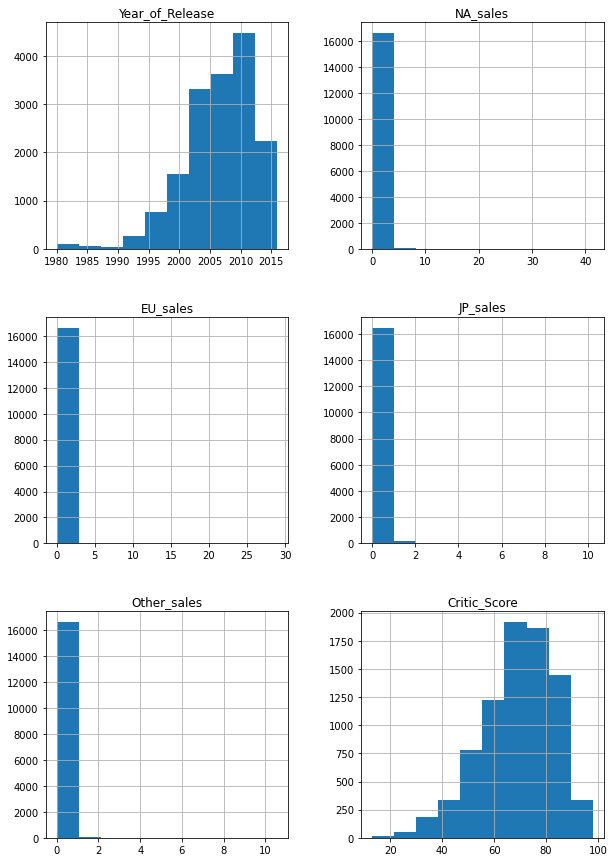

In [5]:
data.hist(figsize=(10, 15));

**Вывод**

В четырех столбцах обнаружено большое количество пропусков - Year_of_Release, Critic_Score, User_Score, Rating, нужно устранить проблемы в данных. Также в названиях колонок — расхождения с хорошим стилем.

## Подготовка данных  

### Стиль заголовков

In [6]:
# перечень названий столбцов таблицы data
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

```
data = data.rename(
   columns = {
        'Name': 'name', 'Platform':'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 
        'NA_sales': 'na_sales', 'EU_sales':'eu_sales','JP_sales':'jp_sales', 'Other_sales':'other_sales',
        'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating',
    }
)
```

In [7]:
data.columns = data.columns.str.lower()

In [8]:
#check
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразование типов данных

Переменная `year_of_release` имеет тип `float64` изменим на `int64` для удобства в работе, но для этого надо обработать данные с пропусками

In [10]:
pd.DataFrame(data.isna().sum()).style.background_gradient()

,0
name,2
platform,0
year_of_release,269
genre,2
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8578
user_score,6701


Так как пропуски составляют 1,6% всех данных, можно их удалить:

In [11]:
data.dropna(subset = ['year_of_release'],inplace = True)

In [12]:
#check
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

In [13]:
data['year_of_release'] = data['year_of_release'].astype('int64')

In [14]:
#check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


### Обработка пропущенных значений

In [15]:
##подсчет пропусков
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

Строки с пропущенными значениями в столбце `name` можно удалить, а пропуски в столбцах `user_score` и `raiting` лучше пока оставить, так как пропуски составляют примерно 40% всех данных.

In [16]:
data.dropna(subset = ['name'],inplace = True)

In [17]:
#check
pd.DataFrame(data.isna().sum()).style.background_gradient()

,0
name,0
platform,0
year_of_release,0
genre,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8461
user_score,6605


In [18]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности - принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

* Расшифровка буквенных обозначений рейтинга:
* «EC» («Early childhood») — «Для детей младшего возраста»
* «E» («Everyone») — «Для всех» (до 1998 года - "K-A" ("Kids to Adults"))
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам»
* «M» («Mature») — «Для взрослых»
* «AO» («Adults Only 18+») — «Только для взрослых»
* «RP» («Rating Pending») — «Рейтинг ожидается» 

То есть игры, где пропущен рейтинг возрастного ограничения были выпущены не в Америке и не в Канаде. Заменим на `0`.

In [19]:
data['rating']=data['rating'].fillna(0)

In [20]:
#check
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

Также тип `object` у столбца `user_score` следует поменять на `float64` для дальнейшей обработки данных

In [21]:
data.loc[(data['user_score'] == 'tbd'), 'user_score'] = np.NaN
data['user_score'] = data['user_score'].astype('float64')

In [22]:
#check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [23]:
#проверим наличие дубликатов
data.duplicated().sum()

0

### Суммарные продажи по регионам

In [24]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,0,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,0,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,0,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,0,0.01


**Вывод**  
Была выполнена подготовка данных: устранили пропуски, измененили тип данных, проверили отсутствие дубликатов, привели названия столбцов к удобному виду.
Добавили столбец с суммарными продажами игр по всем регионам.  
Можно приступить к исследованию.

## Исследовательский анализ данных

### Исследование выпуска игр по годам

In [25]:
#сгруппируем данные по дате релиза и продажам
games_release = data.groupby('year_of_release')[['total_sales', 'name']].agg({'total_sales': 'sum', 'name': 'count'})
games_release.columns = ['total_sales', 'games_released']
games_release

,total_sales,games_released
year_of_release,,
1980,11.38,9
1981,35.68,46
1982,28.88,36
1983,16.80,17
1984,50.35,14
1985,53.95,14
1986,37.08,21
1987,21.70,16
1988,47.21,15


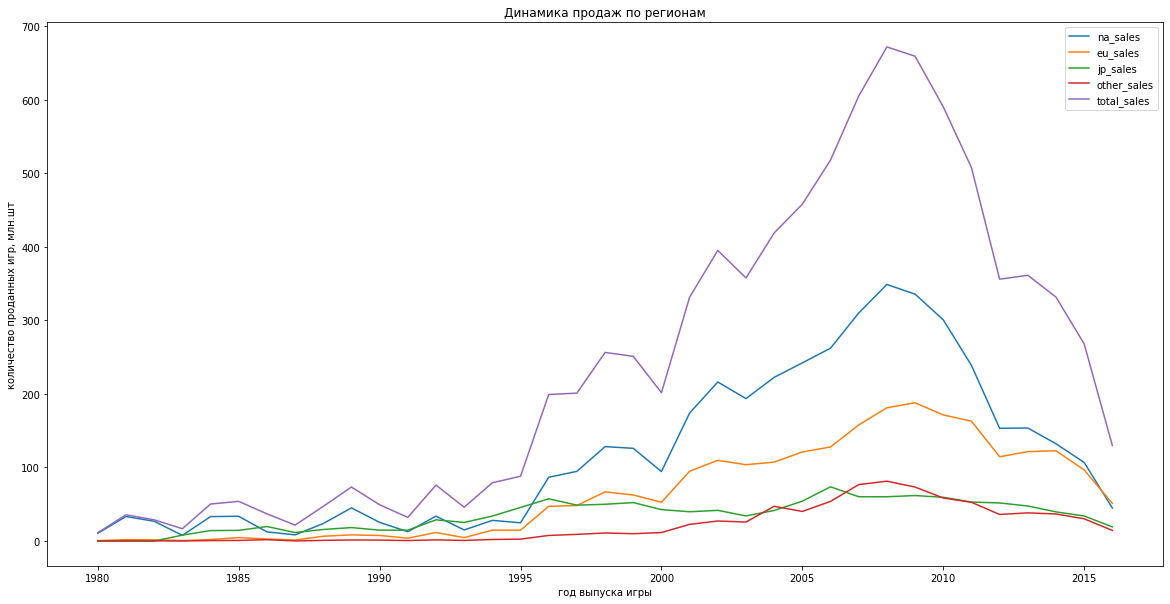

In [26]:
sales = data[[x for x in data.columns if 'sales' in x] + ['year_of_release']]
sales.groupby('year_of_release').sum().plot(figsize=(20,10))
plt.title('Динамика продаж по регионам')
plt.xlabel('год выпуска игры')
plt.ylabel('количество проданных игр, млн.шт');

**Вывод**  
На графике приведена динамика объема продаж компьютерных игр по регионам и в целом в мире. По графику видно, что основная доля продаж приходится на рынок Европы и Северной Америки. Для данных регионов характерен рост спроса на игры в период с 2005-2009 года, и спад в 2009-2015 годах.  
Игровой рынок Японии и других стран практически стабилен на протяжении 15 лет.

### Динамика продаж по игровым платформам.

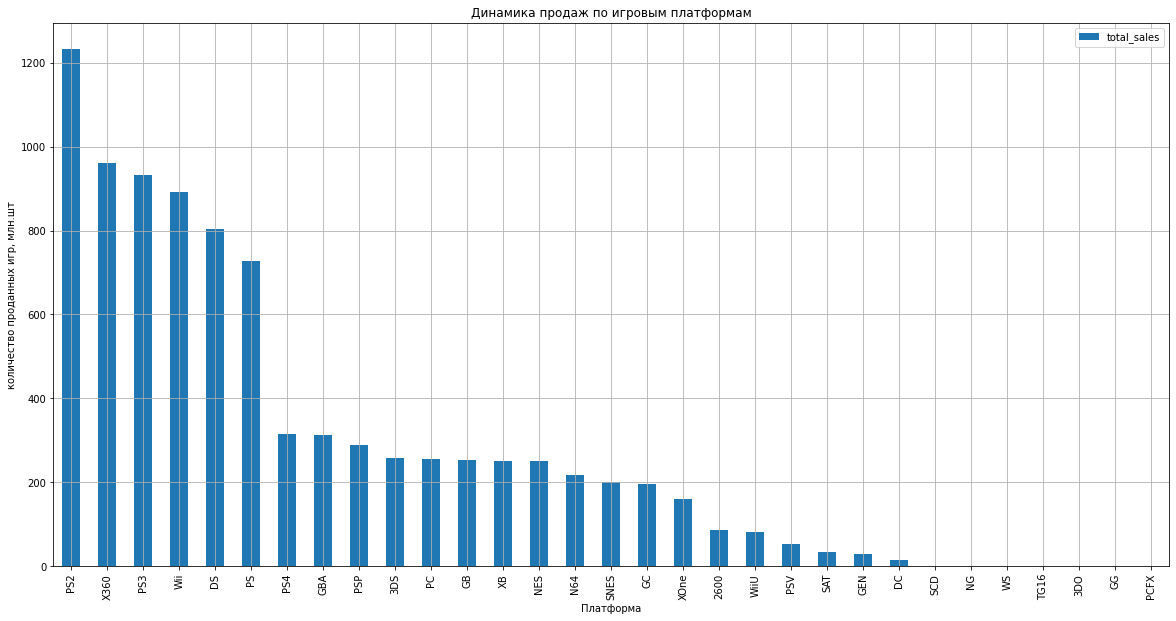

In [27]:
data_platforms = (data
                  .pivot_table(index='platform',values= 'total_sales', aggfunc='sum').sort_values(by='total_sales', ascending =False)
                  .plot(kind='bar', grid=True, figsize=(20,10)))
plt.title('Динамика продаж по игровым платформам')
plt.xlabel('Платформа')
plt.ylabel('количество проданных игр, млн.шт');

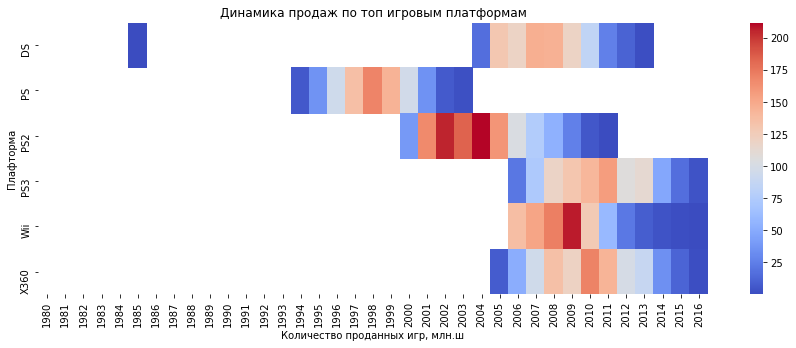

In [28]:
# Группировка платформ с самыми большими продажами по годам
top_sales= (
    data
    .pivot_table(index='platform', values='total_sales', columns = 'year_of_release', aggfunc= 'sum')
    .query('platform in ["PS2", "X360", "Wii", "PS3", "DS", "PS"]')
)
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(top_sales, cmap = "coolwarm")
plt.title('Динамика продаж по топ игровым платформам')
plt.xlabel('Количество проданных игр, млн.ш')
plt.ylabel('Плафторма');

**Вывод**  
На графике видно, что в среднем жизненный цикл у игровых платформ 8-10 лет. Но к 2016 году остались "живы" только три платформы - PS3, Wii, X360. Самые лучшие продажи были у платформы PS2 в 2004 году и Wii в 2009 году.

### Выбор актуального периода для прогноза

За актуальный период для проведения анализа возьмём 2014-2016 гг.

In [29]:
period = data[data['year_of_release'] >= 2014].reset_index(drop=True)
period.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 158.5+ KB


### Выбор топ-платформ

In [30]:
#посмотрим какие платформы попали в этот период
period['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

Text(0.5, 1.0, 'PSP')

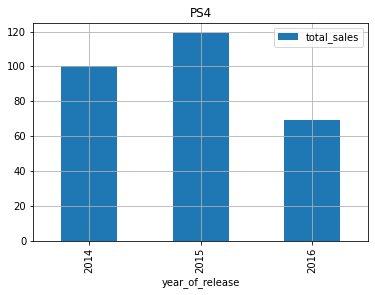

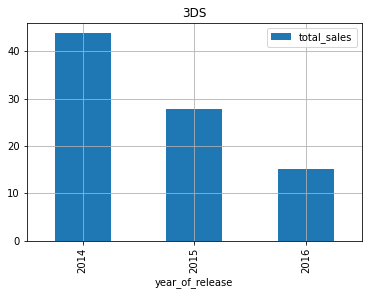

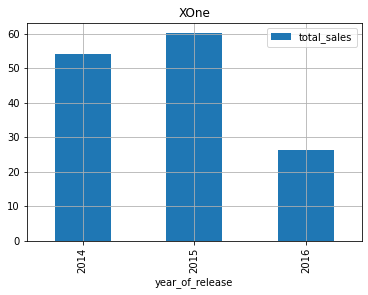

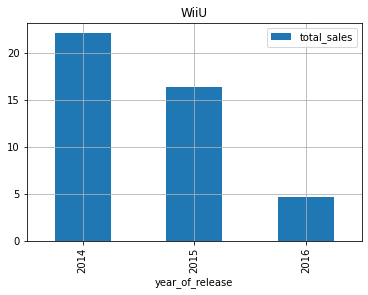

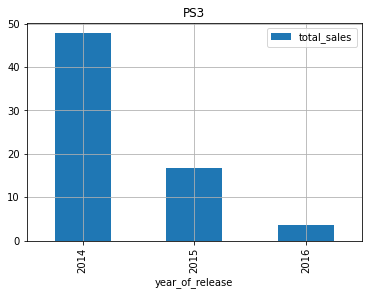

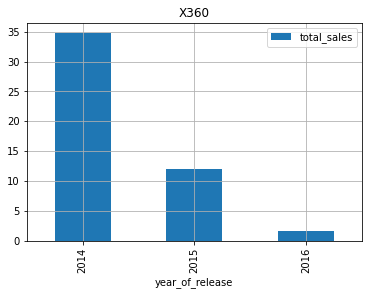

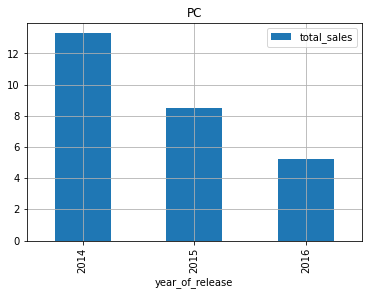

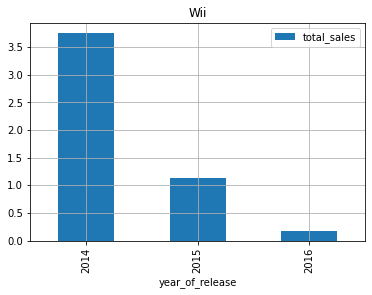

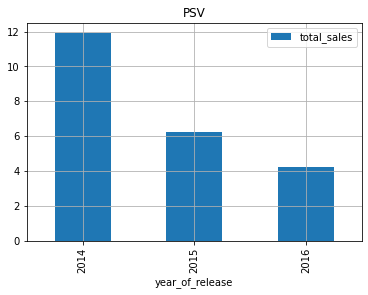

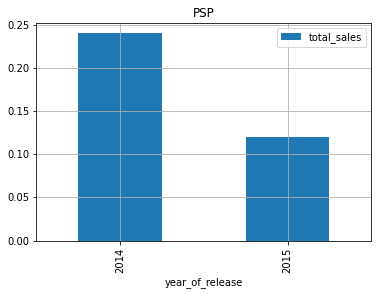

In [31]:
(
    period
    .query('platform == "PS4"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(y='total_sales', kind='bar', grid=True)
)
plt.title('PS4')

(
    period
    .query('platform == "3DS"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(y='total_sales', kind='bar', grid=True)
)
plt.title('3DS')

(
    period
    .query('platform == "XOne"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(y='total_sales', kind='bar', grid=True)
)
plt.title('XOne')

(
    period
    .query('platform == "WiiU"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(y='total_sales', kind='bar', grid=True)
)
plt.title('WiiU')

(
    period
    .query('platform == "PS3"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(y='total_sales', kind='bar', grid=True)
)
plt.title('PS3')

(
    period
    .query('platform == "X360"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(y='total_sales', kind='bar', grid=True)
)
plt.title('X360')

(
    period
    .query('platform == "PC"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(y='total_sales', kind='bar', grid=True)
)
plt.title('PC')

(
    period
    .query('platform == "Wii"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(y='total_sales', kind='bar', grid=True)
)
plt.title('Wii')

(
    period
    .query('platform == "PSV"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(y='total_sales', kind='bar', grid=True)
)
plt.title('PSV')

(
    period
    .query('platform == "PSP"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(y='total_sales', kind='bar', grid=True)
)
plt.title('PSP')

**Вывод**  
После изучения графиков можно сделать такие выводы:

- Бесперспективные платформы, у которых наблюдается снижение продаж: 3DS, WiiU, PS3, X360, PC, Wii, PSV.
- Топовые платформы, у которых наблюдается рост продаж: PS4, XOne.
- Но однозначным лидером пока является плафторма PS4- продажи PS4 в два раза больше чем у XOne.

###  Диаграмма размаха по глобальным продажам игр с разбивкой по платформам.

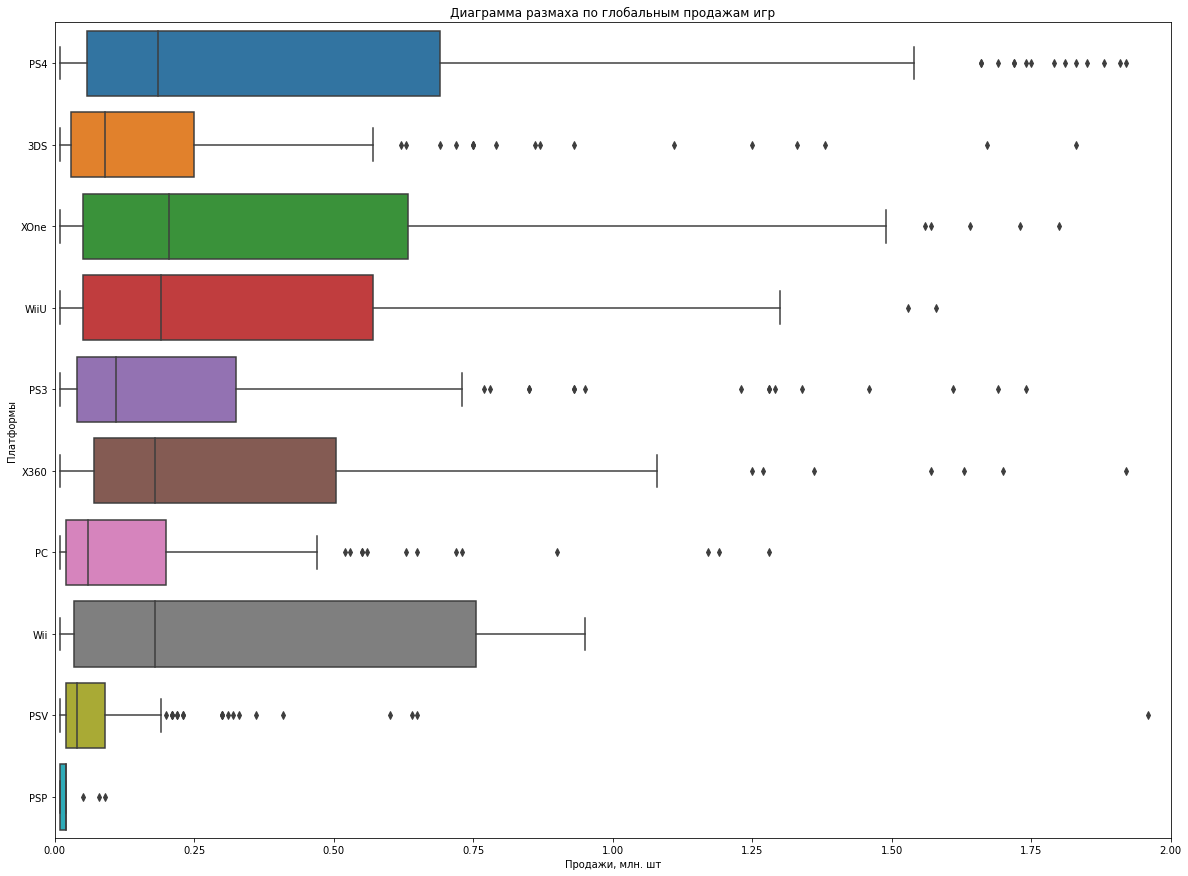

In [32]:
plt.figure(figsize=(20, 15))

sns.boxplot(data=period, x='total_sales', y='platform')
plt.xlim(0, 2)

plt.title('Диаграмма размаха по глобальным продажам игр')
plt.xlabel('Продажи, млн. шт')
plt.ylabel('Платформы')

plt.show()

In [33]:
period.groupby('platform')['total_sales'].describe().sort_values(by='max')

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68


**Вывод**  
В период с 2014 по 2016 самые высокие средние продажи были у игр, произведенных для платформ:
- PS4 (max- 14.63 млн. шт, среднее- 0,77 млн.шт);
- 3DS (max- 11.68 млн. шт, среднее- 0,41 млн.шт).  

### Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы. PS4.

Text(0.5, 1.0, 'Влияние отзывов критиков на продажи')

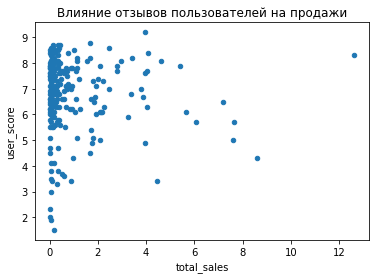

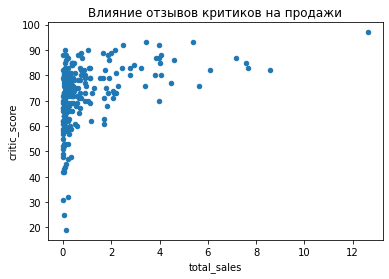

In [34]:
period[period['platform'] == 'PS4'].plot(x='total_sales', y='user_score', kind='scatter')
plt.title('Влияние отзывов пользователей на продажи')
period[period['platform'] == 'PS4'].plot(x='total_sales', y='critic_score', kind='scatter')
plt.title('Влияние отзывов критиков на продажи')

Коэффициенты корреляции Пирсона между отзывами и продажами:

In [35]:
print("Коэффициент корреляции Пирсона между продажами и оценкой пользователей: ",
    period[period['platform'] == 'PS4']['total_sales']
        .corr(period[period['platform'] == 'PS4']['user_score'])
)
print("Коэффициент корреляции Пирсона между продажами и оценкой критиков: ",
    period[period['platform'] == 'PS4']['total_sales']
        .corr(period[period['platform'] == 'PS4']['critic_score'])
)

Коэффициент корреляции Пирсона между продажами и оценкой пользователей:  -0.040131589472697356
Коэффициент корреляции Пирсона между продажами и оценкой критиков:  0.40266141068104083


**Вывод**  
Объём продаж и оценки пользователей практически не коррелируют. Между объёмом продаж и оценками критиков наблюдается слабая прямая корреляция.

### Анализ распределения игр по жанрам

In [36]:
#распределение игр по жанрам в выбранном периоде
period['genre'].value_counts()

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

Больше всего игр с жанром "Action", а меньше всего "Puzzle".

Определим объемы продаж по жанрам:

<AxesSubplot:xlabel='genre'>

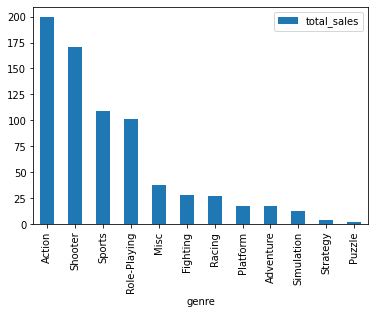

In [37]:
(
    period
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
    .plot(kind = 'bar')
)

В продажах также лидирует жанр "Action" и отстает жанр "Puzzle".

In [38]:
period.groupby('genre')['total_sales'].describe().sort_values(by='max')

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Strategy,37.0,0.107027,0.118412,0.01,0.0300,0.060,0.1400,0.52
Puzzle,14.0,0.157857,0.320629,0.01,0.0200,0.045,0.1000,1.19
Adventure,185.0,0.094865,0.203147,0.01,0.0200,0.030,0.0800,1.66
Simulation,44.0,0.298409,0.646925,0.01,0.0200,0.100,0.3275,3.05
Platform,38.0,0.476053,0.722561,0.01,0.0625,0.140,0.4675,3.21
Misc,113.0,0.332301,0.736999,0.01,0.0300,0.090,0.3200,5.27
Racing,69.0,0.398841,0.963716,0.01,0.0300,0.090,0.2500,7.09
Fighting,60.0,0.470333,1.188053,0.01,0.0600,0.125,0.3200,7.55
Sports,161.0,0.680000,1.239736,0.01,0.0600,0.180,0.6400,8.58


**Вывод**  
У наиболее прибыльных жанров наблюдаем значительную разницу между средними и медианными значениями и большое значение стандартных отклонений, что свидетельствует о неоднородности данных.
Для жанров, приносящих меньше прибыли характерно более низкое стандартное отклонение, но разница между медианой и средним всё же довольно высокая.
После рассмотрения медианных и средних значений можно сделать заключение: жанром-лидером со стабильными продажами с большим отрывом от конкурентов является `Shooter`.

## Портрет каждого пользователя по регионам

### NA (North America)

#### Самые популярные платформы (топ-5)

<AxesSubplot:xlabel='platform'>

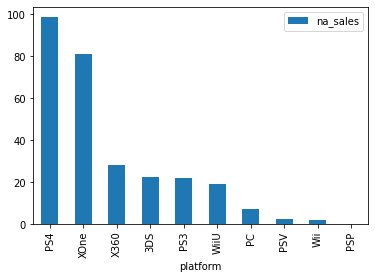

In [52]:
( period
    .pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values('na_sales', ascending=False)
    .plot(kind = 'bar')
)

#### Самые популярные жанры (топ-5)

<AxesSubplot:xlabel='genre'>

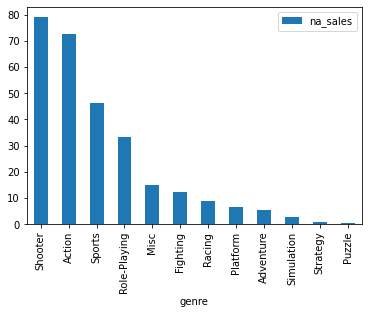

In [40]:
( period
    .pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values('na_sales', ascending=False)
    .plot(kind = 'bar')
)

#### Влияние рейтинга ESRB на продажи

<AxesSubplot:xlabel='rating'>

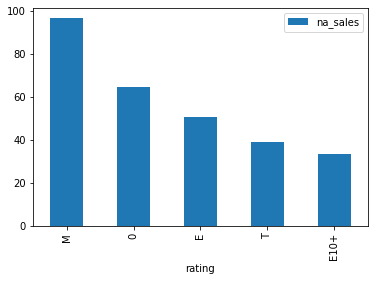

In [41]:
( period
    .pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .sort_values('na_sales', ascending=False)
    .plot(kind = 'bar')
)

**Портрет пользователя из Северной Америки**  
Пользователь из Северной Америки предпочиает жанры `Action` и `Shooter`; игры с рейтингом "для всех"; также предпочитает игровые платформы `PS4` и `XOne`.

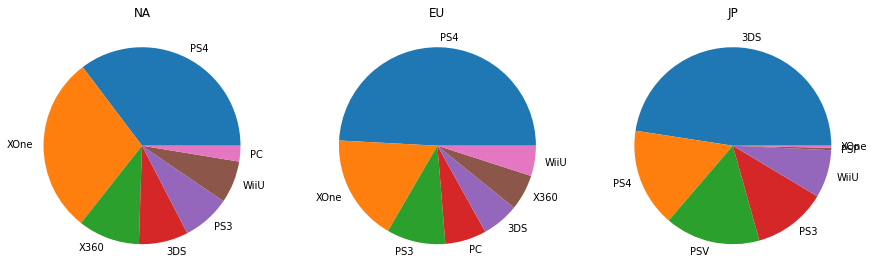

In [54]:
regions2 = period.columns[4:7]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(len(regions2)):
  df_i = (period.groupby('platform')[regions2[i]].sum().
             reset_index().
             sort_values(regions2[i], ascending = False).
             head(7))
  axs[i].pie(df_i[regions2[i]], labels = df_i['platform'])
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

### EU (Europe)

#### Самые популярные платформы (топ-5)

<AxesSubplot:xlabel='platform'>

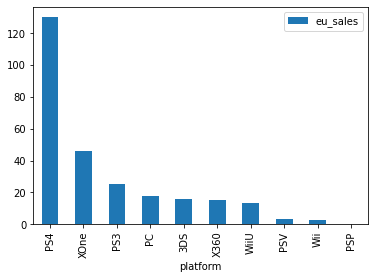

In [42]:
( period
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values('eu_sales', ascending=False)
    .plot(kind = 'bar')
)

#### Самые популярные жанры (топ-5)

<AxesSubplot:xlabel='genre'>

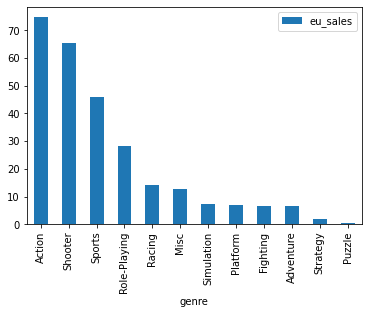

In [43]:
( period
    .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values('eu_sales', ascending=False)
    .plot(kind = 'bar')
)

#### Влияние рейтинга ESRB на продажи

<AxesSubplot:xlabel='rating'>

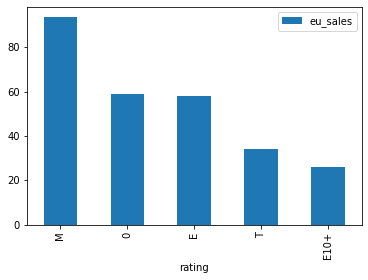

In [44]:
( period
    .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .sort_values('eu_sales', ascending=False)
    .plot(kind = 'bar')
)

**Портрет пользователя из Европы**  
Пользователь из Европы предпочиает жанры `Shooter` и `Action`; игры с рейтингом "для всех" ; однозначно предпочитает игровые платформы `PS4`, `XOne` у него окажется с такой же вероятностью что и `игровой ноутбук` или `3DS`.

### JP (Japan)

#### Самые популярные платформы (топ-5)

<AxesSubplot:xlabel='platform'>

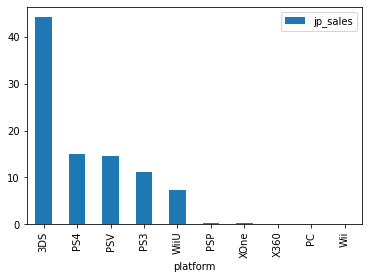

In [45]:
( period
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values('jp_sales', ascending=False)
    .plot(kind = 'bar')
)

#### Самые популярные жанры (топ-5)

<AxesSubplot:xlabel='genre'>

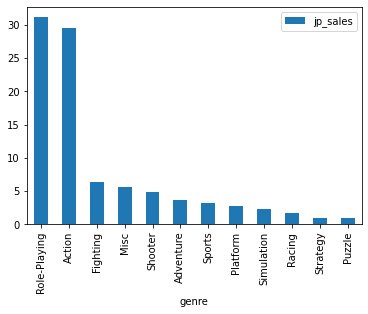

In [46]:
( period
    .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values('jp_sales', ascending=False)
    .plot(kind = 'bar')
)

#### Влияние рейтинга ESRB на продажи

<AxesSubplot:xlabel='rating'>

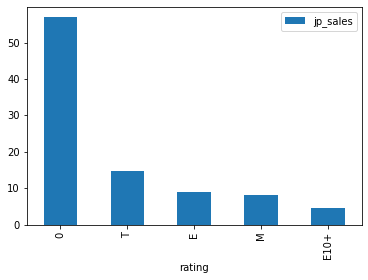

In [47]:
( period
    .pivot_table(index='rating', values ='jp_sales', aggfunc='sum')
    .sort_values('jp_sales', ascending=False)
    .plot(kind = 'bar')
)

**Портрет пользователя из Японии**  
Пользователи из Японии не пользуются `XOne`, и не особо пользуются`PS4`. Они большое предпочтение отдают `3DS`. При выборе жанра Японцы тоже оказались уникальны и выбирают `Role-Playing`.  Значения рейтинга американской ESRB нет у более чем половины игр покупаемых в Японии. 

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: средние пользовательские рейтинги платформы Xbox One равны средним пользовательским рейтингам платформы PC.  
Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются.
```
H_0: user_score пользователей "Xbox One" = user_score пользователей "PC"
H_a: user_score пользователей "Xbox One" ≠ user_score пользователей "PC"
alpha = 0.01
```

In [48]:
from scipy import stats as st

In [49]:
alpha = 0.01
#уберем пропущенные значения в user_score
results = st.ttest_ind(
    period[period['platform'] == 'PC']['user_score'].dropna(), 
    period[period['platform'] == 'XOne']['user_score'].dropna()
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports равные.
```
H_0: user_score пользователей "Action" = user_score пользователей "Sports"
H_a: user_score пользователей "Action" ≠ user_score пользователей "Sports"
alpha = 0.01
```

In [50]:
alpha = 0.01

results = st.ttest_ind(
    period[period['genre'] == 'Action']['user_score'].dropna(), 
    period[period['genre'] == 'Sports']['user_score'].dropna()
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


## Общий вывод

- При первичном обзоре данных в четырех столбцах обнаружено большое количество пропусков - Year_of_Release, Critic_Score, User_Score, Rating - пропуски в столбцах Year_of_Release, Critic_Score скорее всего связаны с тем, что пользователь случайно пропустил значения или посчитал это не столь важным, а в Rating пропуски скорее всего связаны с тем, что играм не был присвоен рейтинг вообще.
- За актуальный период для проведения анализа были выбраны 2014-2016 года, так как я посчитала, что для прогноза на 2017 нужны ближайшие года, и потерявшие популярность платформы и игры вряд ли взлетят в продажах.
- Однозначными лидерамим по показателям за актуальный период является плафторма PS4, XOne.
- Составление портрета пользователей показало: пользователи из Северной Америки и Европы предпочиают жанры Action и Shooter; игры с рейтингом "для всех" или "17+", также предпочитают игровые платформы PS4 и XOne, а пользователи из Японии не пользуются XOne, и не особо пользуются PS4, они большое предпочтение отдают 3DS. При выборе жанра Японцы тоже оказались уникальны и выбирают Role-Playing. Значения рейтинга американской ESRB нет у более чем половины игр покупаемых в Японии.
- На 2017 год я считаю, одними из самых перспективных платформ также будут являтся PS4, XOne и 3DS, также можно учесть что игры для PC - небольшая по объему но стабильная ниша. Самыми популярными жанрами будут являтся стабильно Action, Shooter и Role playing.